# Installing Auxiliar Libs

In [ ]:
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import of Libs

In [ ]:
import pandas     as pd
import numpy      as np
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix

import matplotlib        as mpl
import matplotlib.pyplot as plt
import seaborn           as sns

from ann_visualizer.visualize import ann_viz

from sklearn.metrics import mean_squared_error

# Setting Patterns

In [ ]:
%matplotlib inline

In [ ]:
sns.set_theme()

In [ ]:
tf.random.set_seed(42)

In [ ]:
mpl.rcParams['figure.figsize'] = (22, 8)

# Auxiliar Functions

In [ ]:
def to_number(dataframe):
  numbers = dataframe["D8"].astype(str) + dataframe["D4"].astype(str) + dataframe["D2"].astype(str) + dataframe["D1"].astype(str)
  numbers = numbers.map(lambda line: int(line, 2))

  return numbers

# Data Aquisition

In [ ]:
x_in = pd.read_csv('./X_In.csv')
y_out = pd.read_csv('./Y_Out.csv')

# Data Exploration

In [ ]:
x_in

,G,F,E,D,C,B,A
0,4.231242,0.780309,4.730696,2.156199,0.645430,3.787909,2.969870
1,0.636853,2.024109,2.090387,2.159703,3.502169,2.557124,3.135354
2,2.986594,0.456140,0.779718,3.521068,2.736177,3.317250,2.819513
3,0.038345,4.963844,3.928005,2.248092,3.118439,2.997237,4.477473
4,0.161174,0.377934,0.603821,0.664421,3.294831,4.219109,0.200306
...,...,...,...,...,...,...,...
2995,2.056724,4.477795,3.979243,2.806371,2.103063,0.736982,2.135951
2996,0.618115,0.450802,0.306972,0.445826,4.610452,3.433284,3.341625
2997,0.767298,3.699980,2.148935,3.474454,3.529111,4.851634,3.360225
2998,4.788652,4.666987,0.380597,0.648245,3.777372,3.012495,0.210921


In [ ]:
x_in.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G,3000.0,2.590285,1.604734,0.010077,0.665077,2.903298,3.974684,4.998365
F,3000.0,1.965161,1.690472,0.010112,0.405278,1.399470,3.562746,4.997755
E,3000.0,1.649671,1.631066,0.011430,0.341464,0.661101,3.171319,4.996231
D,3000.0,2.561969,1.599814,0.011554,0.649327,2.826391,3.917133,4.998732
C,3000.0,3.209406,1.243147,0.011094,2.522144,3.380168,4.194329,4.999503
B,3000.0,2.885497,1.475650,0.014197,2.195208,3.129513,4.080856,4.999700
A,3000.0,2.881446,1.460738,0.011204,2.206358,3.122611,4.047043,4.998118


In [ ]:
((x_in <= 0.8).values + (x_in >= 2).values).sum()

21000

In [ ]:
y_out

,D8,D4,D2,D1
0,0,0,1,0
1,0,0,0,0
2,1,0,0,1
3,0,0,0,0
4,0,0,0,1
...,...,...,...,...
2995,0,1,1,0
2996,0,1,1,1
2997,0,0,0,0
2998,0,1,0,0


In [ ]:
y_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
D8,3000.0,0.2,0.400067,0.0,0.0,0.0,0.0,1.0
D4,3000.0,0.4,0.489980,0.0,0.0,0.0,1.0,1.0
D2,3000.0,0.4,0.489980,0.0,0.0,0.0,1.0,1.0
D1,3000.0,0.5,0.500083,0.0,0.0,0.5,1.0,1.0


In [ ]:
y_out.value_counts()

D8  D4  D2  D1
0   0   0   0     300
            1     300
        1   0     300
            1     300
    1   0   0     300
            1     300
        1   0     300
            1     300
1   0   0   0     300
            1     300
dtype: int64

In [ ]:
(y_out["D8"].astype(str) + y_out["D4"].astype(str) + y_out["D2"].astype(str) + y_out["D1"].astype(str)).value_counts()

0010    300
0000    300
1001    300
0001    300
1000    300
0011    300
0111    300
0110    300
0100    300
0101    300
dtype: int64

In [ ]:
print("=" * 25)

for column in y_out.columns:
  print(y_out[column].value_counts())
  print("=" * 25)

0    2400
1     600
Name: D8, dtype: int64
0    1800
1    1200
Name: D4, dtype: int64
0    1800
1    1200
Name: D2, dtype: int64
0    1500
1    1500
Name: D1, dtype: int64


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_in, y_out, test_size=0.2, random_state=42)

In [ ]:
test_x

,G,F,E,D,C,B,A
1801,0.174530,0.188228,0.523334,0.675096,2.484163,2.995934,0.338367
1190,4.207722,0.013703,4.040707,3.004205,0.784202,3.285380,2.722715
1817,2.818136,2.918551,0.306105,0.620222,4.810886,2.800230,0.342616
251,0.399060,0.087293,0.761647,0.755875,4.499389,2.621071,0.554171
2505,0.700935,3.077477,4.305871,3.042248,4.503716,2.352260,3.577462
...,...,...,...,...,...,...,...
104,4.906622,2.294382,3.849350,2.307665,3.022635,3.835095,4.374623
2087,2.155518,4.950391,0.225561,0.315463,4.045515,3.078376,0.707056
599,2.881734,0.445104,2.610229,4.843235,0.723166,4.397560,2.154321
1756,2.900993,4.773931,2.375691,2.627030,3.522794,2.581243,2.118862


In [ ]:
train_x.shape

(2400, 7)

In [ ]:
test_x.shape

(600, 7)

In [ ]:
train_y.shape

(2400, 4)

In [ ]:
test_y.shape

(600, 4)

# Machine Learning

In [ ]:
hidden_size = 20

model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(7,)),
  keras.layers.Dense(hidden_size, activation = 'tanh'),                      
  keras.layers.Dense(4, activation = 'sigmoid'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                160       
                                                                 
 dense_9 (Dense)             (None, 4)                 84        
                                                                 
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________


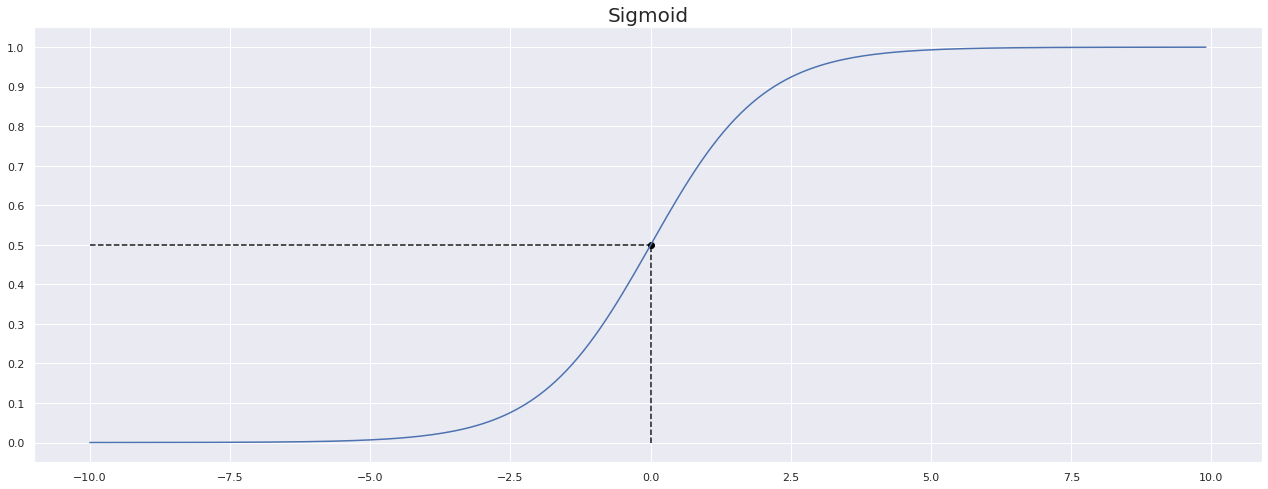

In [ ]:
x = np.arange(-10, 10, 0.1)
y = keras.activations.sigmoid(x)

plt.plot(x, y)

plt.vlines(0, 0, 0.5, linestyle="dashed")
plt.hlines(0.5, -10, 0, linestyle="dashed")
plt.scatter(0, 0.5, zorder=2, color="black")

plt.title("Sigmoid", fontsize=20)
plt.yticks([i / 10 for i in range(11)])

plt.show()

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True) , metrics=['binary_accuracy'])

In [ ]:
ann_viz(model, title=f"MLP with {hidden_size} neurons in hidden layer")

In [ ]:
num_epochs = 100

In [ ]:
result = model.fit(train_x, train_y, epochs=num_epochs, batch_size = 32, validation_data=(test_x, test_y))

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 1s 5ms/step - loss: 0.6159 - binary_accuracy: 0.6678 - val_loss: 0.5482 - val_binary_accuracy: 0.7804
Epoch 2/100
 1/75 [..............................] - ETA: 0s - loss: 0.5224 - binary_accuracy: 0.8125

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 0s 3ms/step - loss: 0.5209 - binary_accuracy: 0.7895 - val_loss: 0.4889 - val_binary_accuracy: 0.8054
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.4698 - binary_accuracy: 0.8148 - val_loss: 0.4436 - val_binary_accuracy: 0.8283
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.4290 - binary_accuracy: 0.8326 - val_loss: 0.4077 - val_binary_accuracy: 0.8367
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3957 - binary_accuracy: 0.8435 - val_loss: 0.3778 - val_binary_accuracy: 0.8450
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3668 - binary_accuracy: 0.8568 - val_loss: 0.3508 - val_binary_accuracy: 0.8554
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3404 - binary_accuracy: 0.8657 - val_loss: 0.3266 - val_binary_accuracy: 0.8629
Epoch 8/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3181 - 

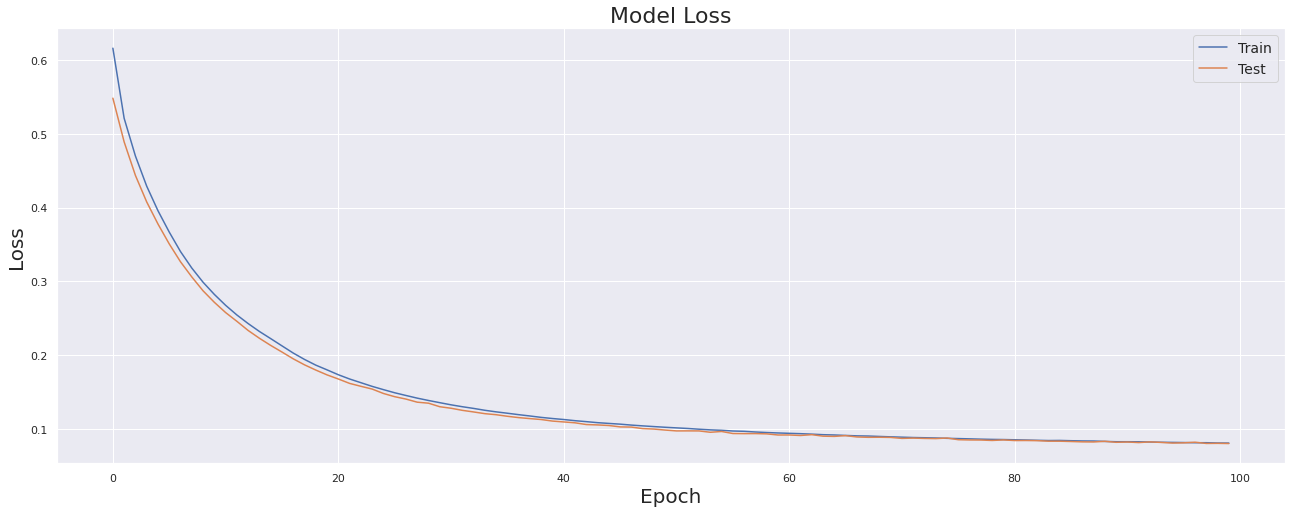

In [ ]:
plt.plot(result.history["loss"], label="Train")
plt.plot(result.history["val_loss"], label="Test")

plt.title('Model Loss', fontsize=22)
plt.ylabel("Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=20)

plt.legend(fontsize=14)
plt.show()

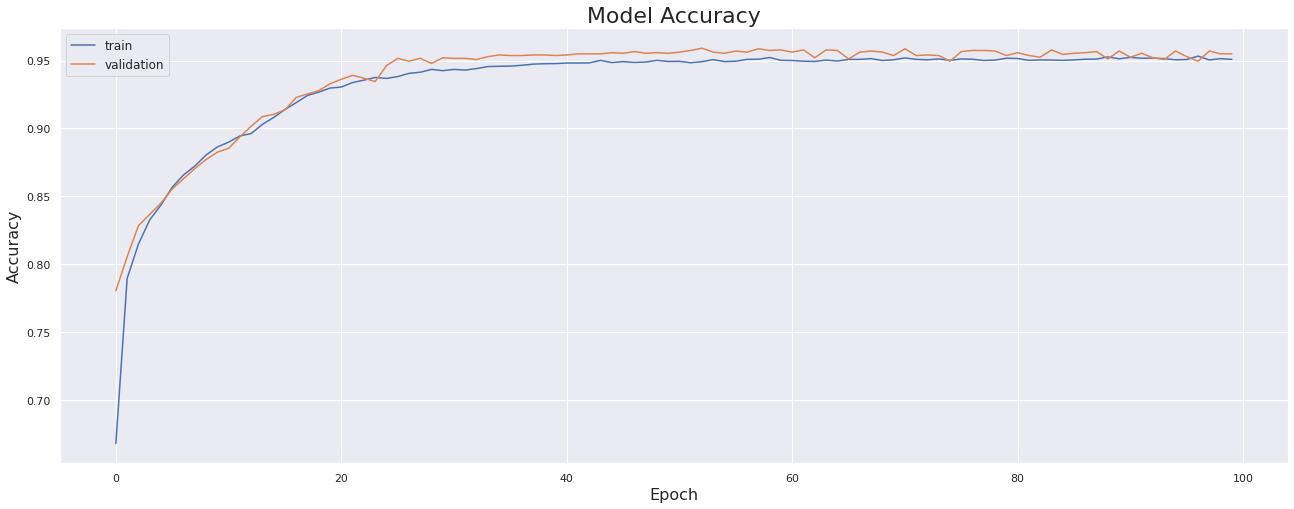

In [ ]:
plt.plot(result.history['binary_accuracy'])
plt.plot(result.history['val_binary_accuracy'])

plt.title('Model Accuracy', fontsize=22)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)

plt.show()

In [ ]:
for layer in model.layers:
    print(layer.trainable_weights)

[<tf.Variable 'dense_8/kernel:0' shape=(7, 20) dtype=float32, numpy=
array([[-0.07628044, -0.00800196,  0.24515127,  0.1011017 , -2.4270804 ,
        -0.1974034 , -0.09453631,  0.24128407, -0.54593146, -0.9634472 ,
        -0.20027305,  0.31451342,  0.2261639 ,  0.16604508,  0.12659794,
         0.9381737 , -0.6953269 ,  0.67613226,  0.6921209 ,  0.1473818 ],
       [ 0.01320475,  0.19082795, -0.01233237,  0.05798471,  0.30633932,
        -1.9501532 , -0.14006434, -0.06433418, -0.00326278,  0.44946814,
         0.71245235, -1.1503061 ,  1.5369179 ,  0.33943683,  0.2855423 ,
         0.67521596,  1.1419927 ,  0.7202807 , -0.7653322 , -0.34358454],
       [-0.5615337 ,  0.91855514,  0.5108604 , -1.9910674 ,  0.54951596,
        -0.06855989, -0.19710217, -1.8495841 ,  0.5237146 , -0.22336741,
         0.39940372, -1.1323005 ,  1.2123116 , -0.05337227, -0.83856326,
        -0.07661294,  0.26597956, -0.8570429 ,  0.60874003,  0.8021126 ],
       [-0.437275  , -0.0081662 ,  0.4331811 ,  0.05

In [ ]:
pred_y = model.predict(test_x)

19/19 [==============================] - 0s 1ms/step


In [ ]:
for i in range(len(pred_y)):
  for j in range(4):
    pred_y[i][j] = 1 if pred_y[i][j] >= 0.5 else 0

In [ ]:
pred_y

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [ ]:
def bin_to_decimal(bit1, bit2, bit3, bit4):
  return 8 * bit1 + 4 * bit2 + 2 * bit3 + 1 * bit4

In [ ]:
pred_y_df = pd.DataFrame(pred_y.astype(int), columns=["D8", "D4", "D2", "D1"])

pred_y_df

,D8,D4,D2,D1
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
595,1,0,0,0
596,0,1,0,0
597,0,0,1,0
598,1,0,0,0


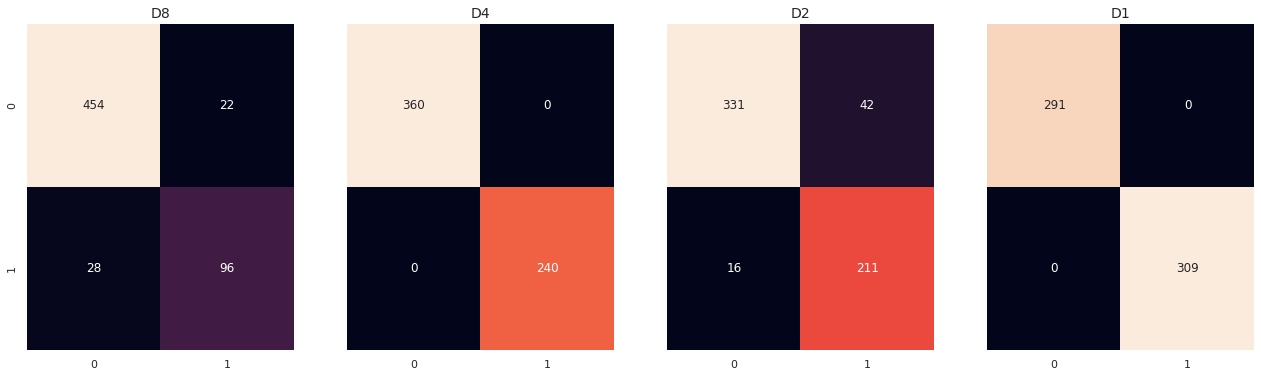

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(22, 6), sharey=True)

sns.heatmap(data=confusion_matrix(test_y.iloc[:, 0], pred_y_df.iloc[:, 0]), ax=ax[0], cbar=False, annot=True, fmt=".0f")
ax[0].set_title("D8", fontsize=14)

sns.heatmap(data=confusion_matrix(test_y.iloc[:, 1], pred_y_df.iloc[:, 1]), ax=ax[1], cbar=False, annot=True, fmt=".0f")
ax[1].set_title("D4", fontsize=14)

sns.heatmap(data=confusion_matrix(test_y.iloc[:, 2], pred_y_df.iloc[:, 2]), ax=ax[2], cbar=False, annot=True, fmt=".0f")
ax[2].set_title("D2", fontsize=14)

sns.heatmap(data=confusion_matrix(test_y.iloc[:, 3], pred_y_df.iloc[:, 3]), ax=ax[3], cbar=False, annot=True, fmt=".0f")
ax[3].set_title("D1", fontsize=14)


plt.show()

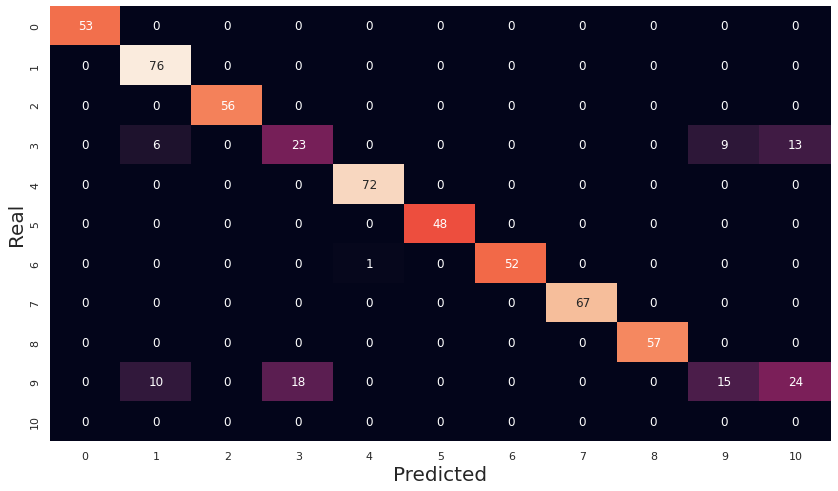

In [ ]:
plt.figure(figsize=(14, 8))

sns.heatmap(data=confusion_matrix(to_number(test_y), to_number(pred_y_df)), cbar=False, annot=True, fmt=".0f")

plt.ylabel("Real", fontsize=20)
plt.xlabel("Predicted", fontsize=20)

plt.show()

In [ ]:
resps = []

for num in pred_y :
  resps.append(bin_to_decimal(num[0], num[1], num[2], num[3]))

resps

[1.0,
 2.0,
 4.0,
 1.0,
 0.0,
 2.0,
 6.0,
 11.0,
 0.0,
 6.0,
 7.0,
 9.0,
 4.0,
 1.0,
 7.0,
 7.0,
 3.0,
 9.0,
 7.0,
 2.0,
 5.0,
 9.0,
 11.0,
 1.0,
 9.0,
 8.0,
 1.0,
 0.0,
 3.0,
 1.0,
 6.0,
 4.0,
 2.0,
 5.0,
 4.0,
 8.0,
 2.0,
 11.0,
 11.0,
 2.0,
 7.0,
 9.0,
 1.0,
 4.0,
 5.0,
 0.0,
 5.0,
 6.0,
 1.0,
 9.0,
 4.0,
 11.0,
 4.0,
 3.0,
 11.0,
 8.0,
 7.0,
 8.0,
 1.0,
 3.0,
 2.0,
 11.0,
 2.0,
 11.0,
 5.0,
 8.0,
 1.0,
 11.0,
 2.0,
 4.0,
 7.0,
 6.0,
 1.0,
 5.0,
 4.0,
 2.0,
 6.0,
 8.0,
 6.0,
 6.0,
 0.0,
 0.0,
 11.0,
 4.0,
 8.0,
 0.0,
 7.0,
 2.0,
 8.0,
 6.0,
 0.0,
 3.0,
 8.0,
 6.0,
 5.0,
 7.0,
 1.0,
 5.0,
 7.0,
 0.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 8.0,
 1.0,
 8.0,
 6.0,
 7.0,
 2.0,
 7.0,
 4.0,
 1.0,
 3.0,
 5.0,
 2.0,
 1.0,
 2.0,
 9.0,
 5.0,
 5.0,
 4.0,
 8.0,
 7.0,
 5.0,
 5.0,
 1.0,
 2.0,
 0.0,
 3.0,
 1.0,
 5.0,
 6.0,
 8.0,
 1.0,
 1.0,
 7.0,
 6.0,
 4.0,
 6.0,
 11.0,
 0.0,
 5.0,
 0.0,
 9.0,
 8.0,
 8.0,
 6.0,
 0.0,
 8.0,
 0.0,
 8.0,
 2.0,
 7.0,
 7.0,
 6.0,
 7.0,
 5.0,
 4.0,
 6.0,
 3.0,
 1.0,
 0.0,
 11.0

In [ ]:
new_tests = [[2.50198930213149,0.439350927051998,2.48548207218913,4.46270844985632,0.437979299603599,2.97579370472236,2.42779734998041],
    [0.224953481291687,0.0591578948752182,0.602966424751168,0.273830529503537,3.02499171823299,2.70892869288254,3.53893831450574],
    [3.34128041389553,0.602692721115502,0.400020475964477,3.82931560737046,3.5671074849897,3.12630353213998,4.73393711196318],
    [2.17655192482015,2.16399848513121,2.60762397175183,2.49228652561193,3.00951002038675,2.10301006956172,4.51720992431126],
    [0.559720280523962,0.36634434746801,0.724544629977762,0.641010440082402,2.31952070757989,2.23330185414082,3.00043385888996],
    [4.27315781515812,4.53206991247133,0.0315961818645098,0.597319924344235,4.1599374900641,3.3087954121267,0.571502003659656],
    [0.772498513516504,4.64595940234057,2.61938414458311,3.75385664047026,2.83013067531399,4.90494814651418,4.6628364149798],
    [0.525645141056299,0.0865338019091946,0.296863857788462,0.303153270370191,3.99470667997045,2.21548681597094,4.49797197525578],
    [4.13369298478893,0.168581931318442,4.62149171535962,2.33383514455161,0.711017560143584,2.519789691746,4.68489968094694],
    [4.45758528479096,0.435873623714479,0.510769428565862,4.62180875413646,3.54083387504983,2.4914252650134,3.28326694687096],
    [0.111697967631273,0.18664601652709,0.457987755263476,0.155734881737423,2.68095654299123,4.42663727065873,0.674601673214305],
    [2.31824541440919,2.15815817197502,3.18040876552552,4.57606458247427,4.31062251778083,4.06848355882073,4.08636788069978],
    [3.14309995813978,2.08915376025929,0.105853631699198,2.96214359549629,2.00649684516174,0.633501822970257,2.14723265908287],
    [3.63737146903211,0.66990344768261,3.51424682224282,2.88455508374377,0.764528037627004,4.9859744200611,4.09216941499024],
    [4.57552818944141,3.59411144932426,2.11621741716333,2.46186997441944,2.99463198936035,0.732412402698918,3.7944437160024],
    [0.619822445397708,3.65536186947519,2.6423169631029,4.29201571651065,3.30768813412371,4.39854630031618,3.67164091499147],
    [0.445872996791149,0.797314425683529,0.372553984435192,0.20824261678695,3.76249460551332,4.83838573472458,3.60834184721916],
    [4.78498132650623,3.76924764436192,0.0749942498949683,0.0826228804037309,4.31682937596116,2.27120655617457,0.18689067065253],
    [0.158693338328967,0.621028093680959,0.712279702805498,0.533141114558088,3.8967233446694,2.49544114357526,0.0534782171488906],
    [0.146862974491457,2.93679211360063,2.47835776385553,2.21417662521272,3.17103345797033,4.46866132131242,4.50674030669954]
    ]

In [ ]:
new_pred_y = model.predict(new_tests)

1/1 [==============================] - 0s 71ms/step


In [ ]:
new_pred_y

array([[1.9845229e-02, 3.1713245e-04, 9.9367261e-01, 2.3023524e-04],
       [2.2006438e-03, 9.9675232e-01, 9.9059618e-01, 9.9977493e-01],
       [5.4362351e-01, 7.6882768e-04, 5.0061542e-01, 9.9997687e-01],
       [7.4533087e-01, 2.7840255e-02, 1.9161551e-01, 1.3222582e-04],
       [4.1995090e-03, 9.8617315e-01, 9.8623800e-01, 9.9882835e-01],
       [5.8329906e-03, 9.9968499e-01, 7.6523102e-05, 1.5266576e-03],
       [5.8086969e-02, 1.4736926e-03, 9.8753697e-04, 2.4054998e-04],
       [5.0334432e-03, 9.9524879e-01, 9.8345792e-01, 9.9996030e-01],
       [9.7217029e-03, 7.5991068e-04, 9.9618012e-01, 9.7896256e-05],
       [5.1784259e-01, 5.0604256e-04, 5.1559895e-01, 9.9997169e-01],
       [1.2508080e-03, 1.9778588e-03, 1.2899236e-02, 9.9931908e-01],
       [8.9018810e-01, 2.9528264e-03, 9.4495170e-02, 4.7573479e-04],
       [1.4648898e-02, 9.9578482e-01, 1.1038081e-02, 9.9892986e-01],
       [5.6564599e-02, 1.9767898e-04, 9.6911079e-01, 4.8264748e-04],
       [8.3754204e-02, 9.8455691e-

In [ ]:
for i in range(len(new_pred_y)):
  for j in range(4):
    new_pred_y[i][j] = 1 if new_pred_y[i][j] >= 0.5 else 0

In [ ]:
new_pred_y

array([[0., 0., 1., 0.],
       [0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 0., 0., 0.],
       [0., 1., 1., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [0., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]], dtype=float32)

In [ ]:
resps = []

for num in new_pred_y :
  resps.append(bin_to_decimal(num[0], num[1], num[2], num[3]))

resps

[2.0,
 7.0,
 11.0,
 8.0,
 7.0,
 4.0,
 0.0,
 7.0,
 2.0,
 11.0,
 1.0,
 8.0,
 5.0,
 2.0,
 6.0,
 0.0,
 7.0,
 4.0,
 1.0,
 0.0]